<a href="https://colab.research.google.com/github/Amirthavarshini2007/SCT_DS_3/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving bank-additional.csv to bank-additional.csv
DataFrame Head:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


Feature matrix shape: (4119, 20)
Target shape: (4119,)

Training samples: 3295
Testing samples: 824
Decision Tree model trained successfully
First 10 predictions: [1 0 0 0 0 0 1 0 0 0]

Accuracy: 0.9053398058252428

Confusion Matrix:
 [[687  45]
 [ 33  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       732
           1       0.57      0.64      0.60        92

    accuracy                           0.91       824
   macro avg       0.76      0.79      0.77       824
weighted avg       0.91      0.91      0.91       824



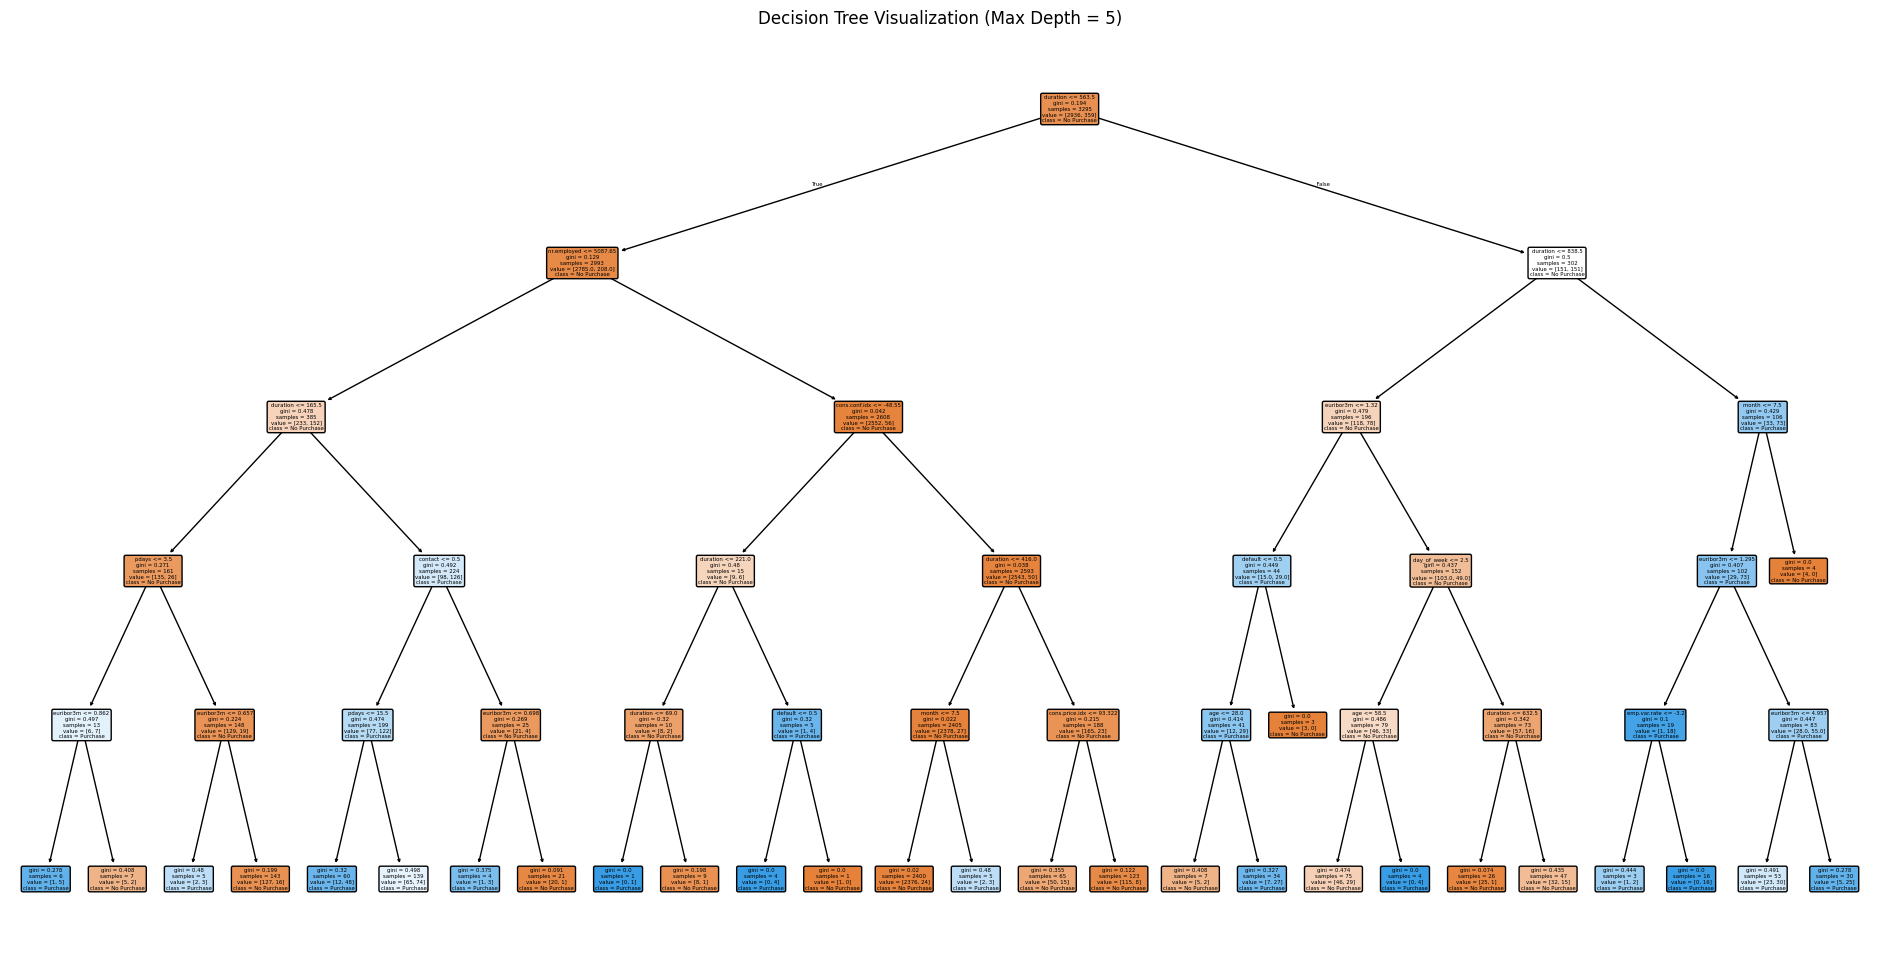

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
uploaded = files.upload()
df = pd.read_csv('bank-additional.csv', sep=',')
print('DataFrame Head:')
display(df.head())
print('\nDataFrame Info:')
df.info()
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print('\nDataFrame after Label Encoding:')
display(df.head())
X = df.drop('y', axis=1)
y = df['y']
print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree model trained successfully")
y_pred = dt_model.predict(X_test)
print('First 10 predictions:', y_pred[:10])
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(24, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True)
plt.title('Decision Tree Visualization (Max Depth = 5)')
plt.show()